# **2.1 Pit stop controller introduction**

Consider a racecar on the pit stop lane requiring to stop correclty at the pit stop without overshooting or stopping too early. There are couple of stratergies that can be used to achieve this task.


<br />
<br />
<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1A49FVDDrYjjjBFm1FVw2_taK8Xuf05d7"
    width="500"/>
</div>
</center>

<br />

1.   Use knowledge of the stopping distance of the car to exactly apply max possible deceleartion at the correct distance. What are the issues associated with this stratergy? what is this control stratergy called?

</br>

* This is a form of **Open loop control** : the method performs physics based preplaning to figure out when to exactly apply brakes so the vehicle comes to a stop at the desired location. It does not take feedback in to consideration, i.e., it blindly executed the plan without adjusting based on what actually happens.</br></br>
2.   Vary the applied breaking force depending on the distance to the target. What are the issues associated with this? what is this control stratergy called?
* This is a form of **Feedback control** : adjust the braking force by continously evaluating the distance to the target. </br></br>
3. In order to determine how close the car is to the pitstop what type of feedback methods (sensors) would work? How to ensure that the feedback is available at sufficient speed, and noise is minimized?
</br> </br>
* The odometer of the vehicel will help with knowng the speed. A position sensor similar to GPS can provide the position upto few meters of accuracy. Closer to the stopping line a camera can  more accurate sense of how far the vehicle is from the stop line. We can use **Sensor fusion (observer)** to combine all this information so its available at faster speed and with improved noise charachteristics.</br>

## **Exercise 1 : Optimal stopping distance -  kinematic planning**

<br />
<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1A49FVDDrYjjjBFm1FVw2_taK8Xuf05d7"
    width="500"/>
</div>
</center>
<br />

A car has an initial speed of $v_{max}$ (meters per second) and is located a distance $-p$ (meters) from a stopping location. If the car can produce a maximun deceleration of $d_{max}$ (meters per second squared), find the distance $s$ (meters) at which the brakes should be applied (as a function of $v_{max}$ and $d_{max}$) so that the car stops at the stopping line? Clearly state your assumptions.

In [ ]:
%%capture
# we clone the following repository for this course which has all the utility functions and visulization functions used in the course.
!pip install jaxlie
!sudo apt update
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended
!sudo apt install cm-super
! rm -r GNCmun
! git clone https://github.com/sendtooscar/GNCmun.git
import sys    
path_to_module = 'GNCmun'
sys.path.append(path_to_module)
import utils as utils
import gnc_animations as gnc
from utils import rotnp
import gnc_animations as gnc

Final position :  -0.7545306211550092  m



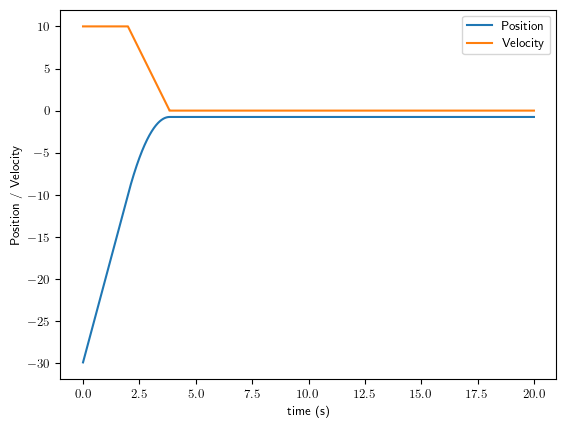

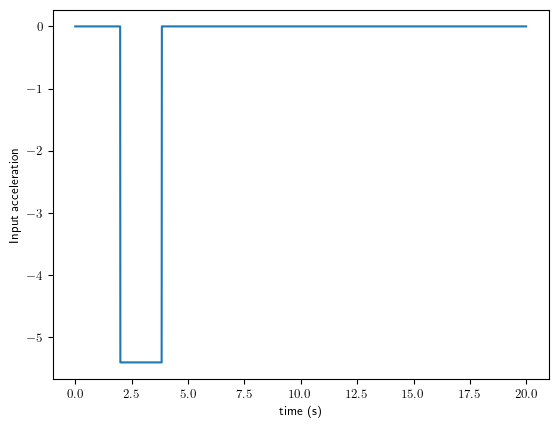

In [ ]:
#@title #**Example 1: Openloop controller for pit stop** { run: "auto" }
#@markdown This simulator models the state propogation of vehicle approaching a pit stop. A maximum deceleration of $d\sim \mathcal{N}(5,0.5)m/s^2$ is applied at a stopping distance predetermined by a controller. Using the simulator given here determine a good stopping distance to appy the breaks through trial and error. Is the simulation deterministic or stochastic? What is the initial condition of this simulation?




import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)

# 1. initialization - init_parameters() -  #TODO by STUDENT : update initialization
dt = 0.01 ;sig_n_u = 0.5 ;sig_n_p = 0.5 ;sig_n_v = 0.005; t_end = 20.0; 
max_decel = 5 ;max_vel = 10.0  ; min_vel = 0.05  # Due to friction there is a minumum velocity that can be achieved
max_decel_act = max_decel  + abs(sig_n_u*np.random.randn()+0.3)
p0 = -30.0  #m
v0 = max_vel 
y_p0 = p0 + sig_n_p*np.random.randn()
y_v0 = v0 + sig_n_v*np.random.randn()
X = []; T= []; U =[]; Y=[]; # Variables for data acquisition

# these vectors are needed to define a system model
x = np.array([p0,v0]) # state vector - variables
y = np.array([y_p0,y_v0]) # measurment vector - variables
param = np.array([dt])  # the parameter vector - constants

stopping_distance = -(max_vel**2)/(2*max_decel)  # change this to get the result
stopping_distance = -10 #@param {type:"slider", min:-30, max:1, step:1.0}

# 2. Simulation  
for t in np.arange(0,t_end,dt):
  # Controller -  open loop pre compute
  if x[0]>stopping_distance and x[1]>min_vel:
    u_ref = -max_decel
    u_ref_act = -max_decel_act
  else:
    u_ref = 0.0 
    u_ref_act =0.0 
  
  u = u_ref_act


  # READ CURRENT STATE X
  p = x[0]
  v = x[1]
  a = u

  # Apply System model
  p = p + v*dt + 0.5*(a)*dt**2
  v = v + (a)*dt
  if abs(v) <= min_vel: # deadzone for velocity
    v=0.0

  # Apply Measurement model
  y_p = p + sig_n_p*np.random.randn()
  y_v = v + sig_n_v*np.random.randn()

  x = np.array([p,v])
  y = np.array([y_p,y_v])
  u = u
  
  #Data Aquisition
  X.append(x) 
  T.append(t)
  Y.append(y)
  U.append(u)

# 4. visualization functions
print("Final position : ", x[0], " m")
fig1= plt.figure()
p = plt.plot(T, X)
plt.xlabel('time (s)')
plt.ylabel('Position /  Velocity')
plt.gca().legend(('Position','Velocity'))


#fig1 = plt.figure()
#p = plt.plot(T, Y)

fig1 = plt.figure()
p = plt.plot(T, U)
plt.xlabel('time (s)')
plt.ylabel('Input acceleration ')
print()

# **Stochastic simulation**

* If a system behaves exactly the way it is mathematically modelled, then we can rely solely on an open loop controller to achieve a desired control task. However, this is rarely the case. There is a degree of randomness in how a system actually behaves. 

* The above simulation attempts to cature this degree of randomness where it produces different results at each run. Try re-running the cell and have a look at the final position value output.

* To achieve this the simulater uses stochastic variables when simulting the system.

* A stochastic variable (or a **random variable**) has a value which is not exactly known (not deterministic). The value is drawn from a probability distribution, so only the statistics related to the random variable are known.

* When a random variable $\nu$ is drawn from a **Gaussian probability distribution**, we say it is a Gaussian variable. We denote this as $$\nu\sim \mathcal{N}(\bar{\nu},\sigma_{\nu}^2),$$
where $\bar{\nu}$ and $\sigma_{\nu}$ are the mean and standard deviation statistics of the random variabel respectively.

* A **zero mean Gaussian noise** is a Gaussian random variable which has a mean of zero. A zero mean Gaussian noise vector $\boldsymbol {\nu}$ is denoted as $$\nu\sim \mathcal{N}(0,\Sigma_{\nu}),$$, where $\Sigma_{\nu}$ is the covariance matrix of Gaussian noise vector. The diagnol of a covariance matrix has the variance $\sigma_{\nu_i}^2$ values of each random variabel $\nu_i$ in the noise vector. 


 


## **Example 1: Stochastic simulation**





Write a code to simualte the following equation:
$$y=p+\eta~~~~ \\ \eta \sim \mathcal{N}(0,\sigma_p^2)$$

with $p=-30m$ and $\sigma_p = 0.5 m $

In [ ]:
import numpy as np
p0 = -30.0  #m
sig_n_p = 0.5
y_p0 = p0 + sig_n_p*np.random.randn()
print(y_p0)

-30.27962854040136


## **Exercise 2: Stochastic simulation of a velocity sensor**

Write a code to simualte a a vehicle odometer which is modeled using the following equation.
$$y_v=v +\eta~~~~ \\ \eta \sim \mathcal{N}(0,\sigma_v)$$

with $p=-30m$, $v=10m/s$ and $\sigma_v = 0.1 m/s $. Assuming that the velocity is not changing for 100 time steps, plot the output of the velocity sensor $y_v$ for the corresponding 100 time steps. 


# **PID Control**

* PID control is a popular feedback control method which uses the sensor feedback to apply a control signal $\bf u$ to the system. 

* This control signal is based on the tracking error $\bf e = y_{des} -y$, i.e the differnece between the desired and the measured output of the system (in the pitstop example it is the position).

* The PID control law takes the following form  $$u = K_pe + K_d\dot{e}+K_i\int edt , $$
where $K_p$, $K_d$ and $K_i$ are the propotional, derivative, and integral gains respectively.

* PIDs are usually manually tuned and often can be implemented without considering the mathematical model governing a system (black box implementation). Therefore, the method is the most popular in control engineering practice. 

* The performance of a PID is charachterized by its tracking behaviour to a step change of a desired state, i.e., step input. 

<br />
<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1vF-zgwEbYkdI6KdzEcGQUbi67jyoyMI5"
    width="500"/>
</div>
</center>
<br />


* The following figure illustrates how each PID parameter affects the settiling time, overshoot, and steady state error of an example system. However this behaviour is not general for all systems. 

In [ ]:
#@title 
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/3/33/PID_Compensation_Animated.gif')

Final position :  0.5515040269834868  m




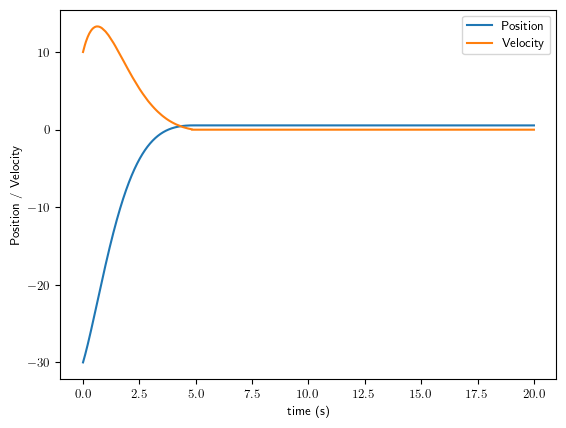

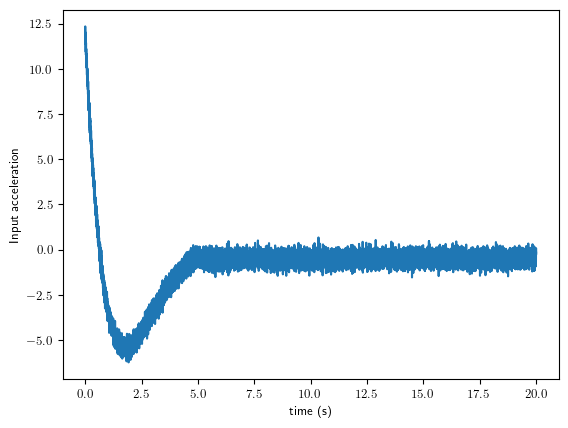

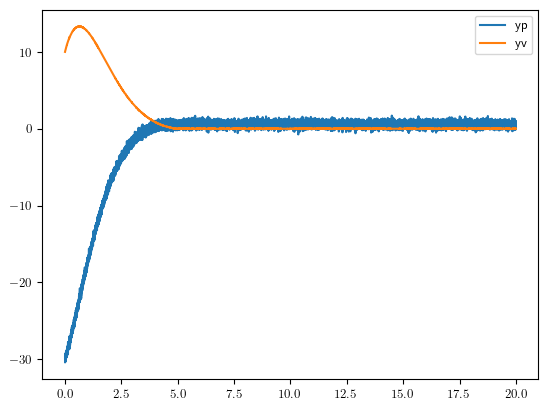

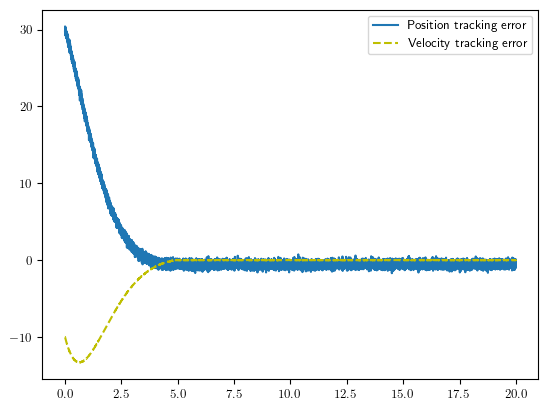

In [ ]:
#@title #**Example 3: Closed loop PID controller for pit stop** { run: "auto" }
#@markdown This simulator models the state propogation of vehicle approaching a pit stop. A deceleration of $d \leq 5m/s^2$ is applied following a feedback control law. 
#@markdown $$u = K_pe + K_d\dot{e}+K_i\int edt \\ e = p_{desired}- p = 0-y_p $$.
#@markdown Using the simulator given here determine suitable PID gains to implement the pitstop controller
#@markdown Here $y_p$ and $y_v$ are the position and velocity sensors used for feedback control. Comment on what can be done regarding the noise in the position sensor feedback?

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)

# 1. initialization - init_parameters() -  #TODO by STUDENT : update initialization
dt = 0.001 ;sig_n_u = 0.5 ;sig_n_p = 0.3 ;sig_n_v = 0.005; t_end = 20.0; 
max_decel = 5 ;max_vel = 10.0  ; min_vel = 0.05  # Due to friction there is a minumum velocity that can be achieved
max_decel_act = max_decel  + abs(sig_n_u*np.random.randn()+0.3)
p0 = -30.0  #m
v0 = max_vel 
y_p0 = p0 + sig_n_p*np.random.randn()
y_v0 = v0 + sig_n_v*np.random.randn()
eI=0
X = []; T= []; U =[]; Y=[];E =[]; Ev=[]; # Variables for data acquisition

# these vectors are needed to define a system model
x = np.array([p0,v0]) # state vector - variables
y = np.array([y_p0,y_v0]) # measurment vector - variables
param = np.array([dt])  # the parameter vector - constants

Kp = 0.9 #@param {type:"slider", min:0.0, max:1, step:0.05}
Kd = 1.5 #@param {type:"slider", min:0.0, max:2, step:0.1}
Ki = 0 #@param {type:"slider", min:0.0, max:0.2, step:0.01}

# 2. Simulation  
for t in np.arange(0,t_end,dt):

  # PID Controller----------------------------------------------------
  e = 0.0 - y[0]
  ev = 0.0 - y[1]
  eI = eI+e
  u_pid = Kp*e + Kd*ev + Ki*eI

  u = u_pid

  # READ CURRENT STATE X
  p = x[0]
  v = x[1]
  a = u

  # Apply System model
  p = p + v*dt + 0.5*(a)*dt**2
  v = v + (a)*dt
  if v <= min_vel: # deadzone for velocity
    v=0.0

  # Apply Measurement model
  y_p = p + sig_n_p*np.random.randn()
  y_v = v + sig_n_v*np.random.randn()

  x = np.array([p,v])
  y = np.array([y_p,y_v])
  u = u
  
  #Data Aquisition
  X.append(x) 
  T.append(t)
  Y.append(y)
  E.append(e)
  Ev.append(ev)
  U.append(u)

# 4. visualization functions
# 4. visualization functions
print("Final position : ", x[0], " m")
fig1= plt.figure()
p = plt.plot(T, X)
plt.xlabel('time (s)')
plt.ylabel('Position /  Velocity')
plt.gca().legend(('Position','Velocity'))
print()

#fig1 = plt.figure()
#p = plt.plot(T, Y)

fig1 = plt.figure()
p = plt.plot(T, U)
plt.xlabel('time (s)')
plt.ylabel('Input acceleration')

fig1 = plt.figure()
p = plt.plot(T, Y)
plt.gca().legend(('yp','yv'))

fig1 = plt.figure()
p = plt.plot(T, E)
p = plt.plot(T, Ev,'--y')
plt.gca().legend(('Position tracking error','Velocity tracking error'))


print()

## **Exercise 3**

Using the simulation above comment on what happens to the system response (position and velocity tracking error) when each of the following parameters are changed.
 1. $K_p$
 2. $K_d$
 3. $K_i$


# **GNC Architecture**

* Combining an open loop stoppping distance planner and a feedback PID controller can be done to achieve improved perfromance. The control system block diagram which achieves this is shown below. 
* An additional block called th observer performs the funciton of estimating the state of the system using noisy sensor measurements from two sensors. An observer gain parameter $K_o$ is used here to tune the combining of the two sensors. This is further discussed in the navigation syste design portion of the course.

<br />
<center>
<div>
<img src="https://drive.google.com/uc?export=view&id=1047Bj7XezPM27bQn_0s9k_x8KHAALzrt"
    width="500"/>
</div>
</center>
<br />


Final position :  0.02108282265471235  m




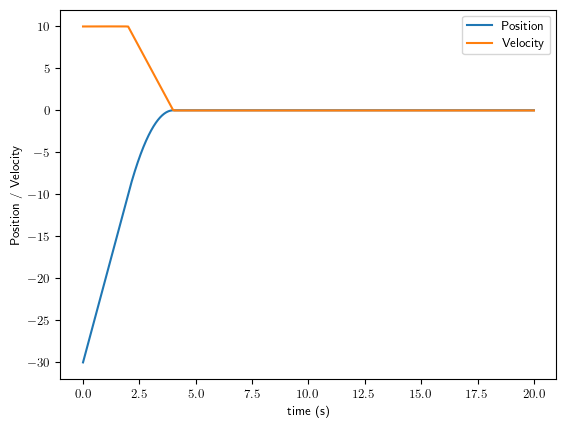

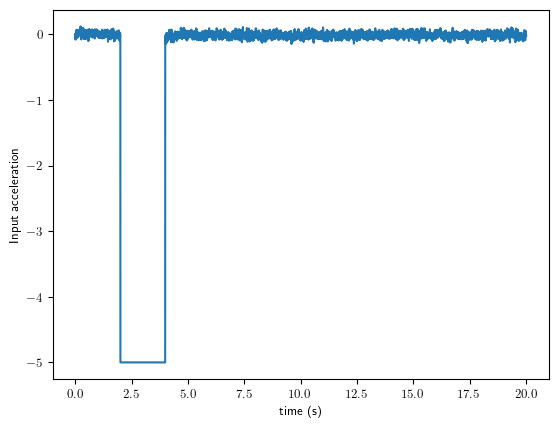

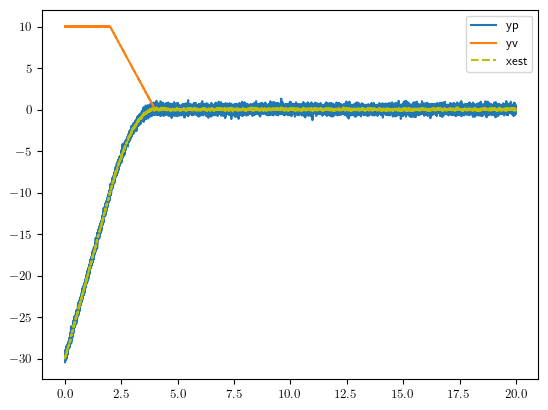

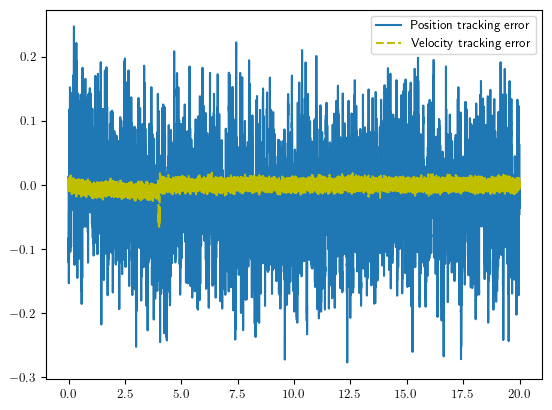

In [ ]:
#@title #**Example 4: GNC for pit stop (planner, PID, and observer)** { run: "auto" }
#@markdown This simulator models the state propogation of vehicle approaching a pit stop. A deceleration of $d \leq 5m/s^2$ is applied following a feedback control law and a planner providing openloop reference control input accounting for the stopping distance. 
#@markdown Using the simulator given here determine suitable PID gains and stopping distance to implement the pitstop controller. How does the observer gain $Ko$ affect the estimated position and the perfromance of the controller?


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

# We maintain the following numpy vectors  dx = f(x,u,t,param,w) , y = h(x,param,v)

# 1. initialization - init_parameters() -  #TODO by STUDENT : update initialization
dt = 0.001 ;sig_n_u = 0.5 ;sig_n_p = 0.3 ;sig_n_v = 0.005; t_end = 20.0; 
max_decel = 5 ;max_vel = 10.0  ; min_vel = 0.05  # Due to friction there is a minumum velocity that can be achieved
max_decel_act = max_decel  + abs(sig_n_u*np.random.randn()+0.3)
p0 = -30.0  #m
v0 = max_vel 
y_p0 = p0 + sig_n_p*np.random.randn()
y_v0 = v0 + sig_n_v*np.random.randn()
eI=0
X = []; T= []; U =[]; Y=[]; X_est = []; E=[]; Ev=[]; # Variables for data acquisition

# these vectors are needed to define a system model
x = np.array([p0,v0]) # state vector - variables
x_ref =x 
x_est =x[0]
y = np.array([y_p0,y_v0]) # measurment vector - variables
param = np.array([dt])  # the parameter vector - constants

stopping_distance = -10 #@param {type:"slider", min:-30, max:1, step:1.0}
Kp = 0.5 #@param {type:"slider", min:0.0, max:1, step:0.05}
Kd = 1.3 #@param {type:"slider", min:0.0, max:2, step:0.1}
Ki = 0 #@param {type:"slider", min:0.0, max:0.2, step:0.01}
Ko = 0.1 #@param {type:"slider", min:0.0, max:1, step:0.05}

# 2. Simulation  
for t in np.arange(0,t_end,dt):
  # Open loop Controller -  open loop pre compute---------------------------
  if x_ref[0]>stopping_distance and x_ref[0]<=0.0 and x_ref[1]>min_vel:
    u_ref = -max_decel
    u_ref_act = -max_decel_act
  else:
    u_ref = 0.0 
    u_ref_act =0.0 
  
  
  p_ref = x_ref[0] + x_ref[1]*dt + 0.5*(u_ref)*dt**2
  v_ref = x_ref[1] + (u_ref)*dt
  if v_ref < min_vel: # deadzone for velocity
    v_ref=0.0
  x_ref = np.array([p_ref,v_ref])


  # PID Controller----------------------------------------------------------
  e = x_ref[0]- x_est
  ev = x_ref[1] - y[1]
  eI = eI+e
  u_pid = Kp*e + Kd*ev + Ki*eI

  u = u_ref_act +u_pid
  if u <-max_decel:
    u=-max_decel

  # READ CURRENT STATE X
  p = x[0]
  v = x[1]
  a = u

  # Apply System model
  p = p + v*dt + 0.5*(a)*dt**2
  v = v + (a)*dt
  if np.abs(v) <= min_vel : # deadzone for velocity
    v=0.0

  # Apply Measurement model
  y_p = p + sig_n_p*np.random.randn()
  y_v = v + sig_n_v*np.random.randn()

  x = np.array([p,v])
  y = np.array([y_p,y_v])
  u = u

  x_est = x_est + y_v*dt
  x_est = x_est + Ko*(y_p-x_est)

  #Data Aquisition
  X.append(x) 
  T.append(t)
  Y.append(y)
  U.append(u)
  E.append(e)
  Ev.append(ev)
  X_est.append(x_est)

# 4. visualization functions
print("Final position : ", x[0], " m")
fig1= plt.figure()
p = plt.plot(T, X)
plt.xlabel('time (s)')
plt.ylabel('Position /  Velocity')
plt.gca().legend(('Position','Velocity'))
print()

fig1 = plt.figure()
p = plt.plot(T, U)
plt.xlabel('time (s)')
plt.ylabel('Input acceleration')

fig1 = plt.figure()
p = plt.plot(T, Y)
p = plt.plot(T, X_est,'--y')
plt.gca().legend(('yp','yv','xest'))

fig1 = plt.figure()
p = plt.plot(T, E)
p = plt.plot(T, Ev,'--y')
plt.gca().legend(('Position tracking error','Velocity tracking error'))

print()


Here we used a PID contoller to achive correct stopping and a level of pre-planning was performed which provided the stopping distance. The feedback was available at a sufficiently fast rate to achieve feedback control. After tuning the required functionality can be achieved. In this topic we will see how it worked and remained stable with the underlying mathematical concepts which allows to design a GNC architecture stably and having close to optimal performance for the assumed mathematical model of the system.